<a href="https://colab.research.google.com/github/HaiderAltaf/Gradient-Descent-Algorithm-and-its-variants/blob/main/cs6910_assig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use from keras.datasets import fashion_mnist for getting the fashion mnist dataset.

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import math

In [3]:
! pip install wandb
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=a6ba2d11eb675a97a609193582db6e006950a7374b673e166aa683b0f425db5f
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools


importing the Fashion-MNIST Dataset

In [4]:
dataset = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


separating training(60,000 images) and testing(10,000) image data

In [5]:
(x_train, y_train), (x_test, y_test) = dataset
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2] )/255
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255

Separating 10% from training data for validation

In [6]:
validation_size = int(len(X_train)*0.1)

# randomly shuffle the indices of the data
shuffled_indices = np.random.permutation(len(X_train))

# split the shuffled data into training and validation sets
train_indices, validation_indices = shuffled_indices[:-validation_size], shuffled_indices[-validation_size:]
X_train, X_validation = X_train[train_indices], X_train[validation_indices]
y_train, y_validation = y_train[train_indices], y_train[validation_indices]

 plot 1 sample image for each class 

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


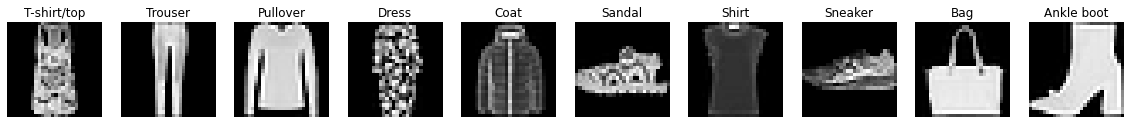

In [7]:
# Initialize WandB
wandb.init(project="cs6910_trial")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
          
no_of_classes = len(class_names)
fig, axes = plt.subplots(1, no_of_classes, figsize=(20,20))

list_of_images  = []   # to give to the wandb

for i in range(no_of_classes):
   
    # Find the index of the first image of each class
    idx = np.where(y_train == i)[0][0]
    
    # Plot the image
    image = axes[i].imshow(X_train[idx].reshape(28,28), cmap='gray')
    axes[i].set_title(class_names[i])
    axes[i].axis('off')
    list_of_images.append(image)


plt.show()



In [8]:
wandb.log({"Question 1": [wandb.Image(img, caption=caption) for img, caption in zip(list_of_images, class_names)]})

# Question 2 

Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

In [17]:
L = int(input("Enter the number of Hidden + outer layer: "))

Enter the number of Hidden + outer layer: 3


In [18]:
n = int(input("Enter the numbers of neuron in each hidden layer: "))

Enter the numbers of neuron in each hidden layer: 32


In [19]:
no_of_classes = len(np.unique(y_train))

In [20]:
choice = int(input("For random weights initialisation enter 1 and for xavier enter 2: "))

For random weights initialisation enter 1 and for xavier enter 2: 2


In [21]:
def weights(choice, n, L, X_train, no_of_classes):
  
  Weights = []
  np.random.seed(0)

  if choice ==1:
    temp = np.random.rand(n, len(X_train[0]))
    Weights.append(temp)

    for i in range(1, L-1):
      temp = np.random.rand(n, n)
      Weights.append(temp)

    temp = np.random.rand(no_of_classes, n)
    Weights.append(temp)

  if choice ==2:
    scale = 1/max(1, (2+2)/2 )
    limit = math.sqrt(3*scale)

    temp = np.random.uniform(-limit, limit, size=(n, len(X_train[0]))) 
    Weights.append(temp)
    for i in range(1, L-1):
      temp  = np.random.uniform(-limit, limit, size=(n,n))
      Weights.append(temp)

    temp = np.random.uniform(-limit, limit, size=(no_of_classes, n)) 
    Weights.append(temp)

  if choice ==3:
    temp = np.zeros((n, len(X_train[0])))
    Weights.append(temp)

    for i in range(1, L-1):
      temp = np.zeros((n, n))
      Weights.append(temp)

    temp = np.zeros((no_of_classes, n))
    Weights.append(temp)

  
  return Weights



In [22]:
def biases(choice, n, L, y_train, no_of_classes):
  
  bias = []
  np.random.seed(0)

  if choice ==1:
    for i in range(L-1):
      temp = np.random.rand(n)  # for schochastic GD
      #temp = np.random.rand(len(y_train),n)  # for Vanilla GD
      bias.append(temp)
    
    temp = np.random.rand(no_of_classes)   # for schochastic GD
    #temp = np.random.rand(len(y_train), no_of_classes)   # for Vanilla GD
    bias.append(temp)

  if choice ==2:
    scale = 1/max(1, (2+2)/2 )
    limit = math.sqrt(3*scale)
    for i in range(L-1):
      temp  = np.random.uniform(-limit, limit, size=(n))   # for schochastic GD
      #temp  = np.random.uniform(-limit, limit, size=(len(y_train),n))  # for Vanilla GD
      bias.append(temp)

    temp = np.random.uniform(-limit, limit, size=(no_of_classes))   # for schochastic GD
    #temp = np.random.uniform(-limit, limit, size=(len(y_train),no_of_classes)) # for Vanilla GD
    bias.append(temp)

  if choice ==3:
    for i in range(L-1):
      temp = np.zeros(n)
      bias.append(temp)

    temp = np.zeros(no_of_classes)
    bias.append(temp)

  
  return bias


In [109]:
Weights = weights(choice, n, L, X_train, no_of_classes)

In [110]:
bias = biases(choice, n, L, y_train, no_of_classes)

Activation Functions

In [25]:
def sigmoid(a):
  a = np.float128(a)
  return 1/(1+np.exp(-a))

def tanh(a):
  return (np.exp(a)-np.exp(-a))/(np.exp(a)+np.exp(-a))

def ReLu(a):
  i=0
  for ele in a:
    a[i] = max(0,ele)
    i+=1
  if choice ==1:
    return a - max(a)
  #   j=0
  #   for num in ele:

  #     a[i][j] = max(0,num)
  #     j+=1
  #   i+=1
  return a

def softmax(a):
  # temp = np.zeros_like(a)
  # for i in range(len(temp)):
  #   temp[i] = np.float128(a[i])
  #exp_logits = np.exp(a)
  return np.exp(a)/np.sum(np.exp(a))   
  
def der_sigmoid(a):
  return sigmoid(a)*(1-sigmoid(a))

def der_tanh(a):
  return 1-(tanh(a)*tanh(a))

def der_ReLu(a):

  # it will create a matrix of same dimension as of a.
  gradient = np.zeros_like(a)  
  # sets the entries of gradient to 1 where the corresponding entries of x>=0
  gradient[a >= 0] = 1
  return gradient

Loss functions

In [88]:
def cross_entropy_loss(y_dash, y_train, X_train):
  losses = -np.log(y_dash[y_train])/len(X_train)
  return losses

def MSE_loss(y_dash, y_train, X_train):
  y_train_modified = np.zeros(10)
  y_train_modified[y_train] = 1
  losses = (np.sum(y_dash - y_train_modified))
  return losses

Forward Propagation

In [26]:
def forward_propagation(Weights, bias, x_input, L):
  
  h = x_input
  a_out = []
  h_out = []
  h_out.append(h)
  
  ## for hidden layers
  for k in range(L-1):
    #a = np.dot(h, Weights[k]) + bias[k]
    a = np.matmul(Weights[k], h) + bias[k]
    a_out.append(a)
    ## default activation function is sigmoid 
    h = sigmoid(a)
    h_out.append(h)

  ## In outer layer softmax function
  #a = np.dot(h, Weights[L-1]) + bias[L-1]
  a = np.matmul(Weights[L-1], h) + bias[L-1]
  a_out.append(a)
  y_dash = softmax(a)
  

  return a_out, h_out, y_dash


Backward propagation

In [27]:
def backward_propagation(a_out, h_out, y_train, y_dash, Weights, L, L2_decay):

  grad_W = [0]*L
  grad_b = [0]*L

  
  ## change each y_train into an array of 10 values
  y_train_modified = np.zeros(10)
  y_train_modified[y_train] = 1
    
  output_gradient = -(y_train_modified - y_dash)

  for k in range(L, 0, -1):

    ## compute gradients w.r.t parameters
    W_gradient = np.matmul(output_gradient.reshape(len(output_gradient),1), h_out[k-1].reshape(1,len(h_out[k-1]))) 
    grad_W[k-1] = W_gradient

    b_gradients = output_gradient 
    grad_b[k-1] = b_gradients
   
    if k==1:
      continue
    ## compute gradients w.r.t layer below
    weight = Weights[k-1]
    h_gradient = np.matmul(weight.T, output_gradient)

    ## compute the gradient of pre activation layer
    output_gradient = np.multiply(h_gradient, der_sigmoid(a_out[k-2]))

  return grad_W, grad_b



In [104]:
a_out, h_out, y_dash = forward_propagation(Weights, bias, X_train[0], L)

In [105]:
grad_W, grad_b = backward_propagation(a_out, h_out, y_train, y_dash, Weights, L, 0.005)

Model Accuracy

In [49]:
def Model_accuracy(X_validation, y_validation, Weights, bias, L):

  y_pred = np.zeros((len(X_validation), 10))
  i=0
  for x in X_validation:
    _, _, y_dash = forward_propagation(Weights, bias, x, L)
    y_pred[i] = y_dash
    i+=1

  correct = 0
  for array,y in zip(y_pred, y_validation):
    if np.argmax(array)==y:
      correct+=1
  accuracy = correct*100/len(y_validation)

  return  accuracy

In [53]:
Model_accuracy(X_validation, y_validation, Weights, bias, L)

71.3

#Mini Batch Gradient Descent 
if batch_size = 1, the algorithm will be stochastic gradient descent.
if batch_size = Number of samples, the algorithm will be vanilla gradient descent


In [78]:
def Minibatch_gradient_descent(learning_rate, Weights, bias, L, y_train, X_train, no_of_classes, batch_size, L2_decay):
  
  ## initialize the gradients of weights and biases
  dW = weights(3, n, L, X_train, no_of_classes)
  dB = biases(3, n, L, y_train, no_of_classes)
  ## initialize the loss
  loss = 0
  num_points_seen = 0

  for x,y in zip(X_train,y_train):

    ##x,y = np.float128(x), np.float128(y)

    ## Forward propagation
    a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
    
    #loss_iter = MSE_loss(y_dash, y_train, X_train)  # for MSE loss use this
    loss_iter = cross_entropy_loss(y_dash, y, X_train)  # for cross entropy use this
    loss += loss_iter


    ## Backward Propagation
    grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L, L2_decay)

    ## Adding the gradients of weights and biases
    dW = [dW[i] + grad_W[i] for i in range(len(dW))]
    dB = [dB[i] + grad_b[i] for i in range(len(dB))]
     
    num_points_seen+=1
    
    if num_points_seen%batch_size == 0:

      ## Add L2 regularization penalty to gradient
      dW = [dW[i] + 2*L2_decay*Weights[i]/len(X_train) for i in range(len(dW))]
      # Weights updates
      
      Weights = [Weights[i] - dW[i]*learning_rate for i in range(L)]

      # Biases updates
      bias = [bias[i] - dB[i]*learning_rate for i in range(L)]

      
      ## initialize the gradients of weights and biases
      dW = weights(3, n, L, X_train, no_of_classes)
      dB = biases(3, n, L, y_train, no_of_classes)
  # Adding L2 regularization loss after an epochS
  for i in range(len(Weights)):
    loss = loss + 2*L2_decay*np.sum(Weights[i]**2)/len(X_train)
  
  return Weights, bias, loss


In [79]:
for i in range(10):
  Weights, bias, loss = Minibatch_gradient_descent(0.0001, Weights, bias, L, y_train, X_train, no_of_classes, 25, 0)
  print(i, loss)
# Finish the WandB run
#wandb.finish()

0 2.7502577582561744491
1 1.8043595735334898072
2 1.5832133233969766883
3 1.4359097059015334201
4 1.3266704617557013966
5 1.2404861694744863456
6 1.1697466090772752014
7 1.1106282530330283914
8 1.0608271915901231603
9 1.0185881267326671076


In [108]:
Model_accuracy(X_validation, y_validation, Weights, bias, L)

79.56666666666666

#Mini Batch Momentum based Gradient Descent
if batch_size = 1, the algorithm will be stochastic gradient descent. if batch_size = Number of samples, the algorithm will be vanilla gradient descent

In [89]:
def Minibatch_Momentum_GD(Weights, bias, L, X_train, y_train, beta, no_of_classes, prev_uw, prev_ub, learning_rate, batch_size, L2_decay):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)
    ## initialize the loss
    loss = 0
    num_points_seen = 0

    for x,y in zip(X_train, y_train):

      #x = np.float128(x)

      ## Forward propagation
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      
      #loss_iter = MSE_loss(y_dash, y_train, X_train)  # for MSE loss use this
      loss_iter = cross_entropy_loss(y_dash, y, X_train)  # for cross entropy use this
      loss += loss_iter

      ## Backward Propagation
      grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L, L2_decay)

      ## Adding the gradients of weights and biases
      dW = [dW[i] + grad_W[i] for i in range(len(dW))]
      dB = [dB[i] + grad_b[i] for i in range(len(dB))]

      num_points_seen +=1
 
      if num_points_seen%batch_size==0:

        ## Add L2 regularization penalty to gradient
        dW = [dW[i] + 2*L2_decay*Weights[i]/len(X_train) for i in range(len(dW))]

        ## momentum based wight updates
        uw = [prev_uw[i]*beta + dW[i]*learning_rate for i in range(len(dW))]
        ub = [prev_ub[i]*beta + dB[i]*learning_rate for i in range(len(dB))]
        
        ## Weights and biases updates
        # Weights updates
        Weights = [Weights[i] - uw[i] for i in range(len(uw))]

        # Biases updates
        bias = [bias[i] - ub[i] for i in range(len(ub))]

        # assign present to the history 
        prev_uw = uw
        prev_ub = ub

        dW = weights(3, n, L, X_train, no_of_classes)
        dB = biases(3, n, L, y_train, no_of_classes)
    
     # Adding L2 regularization loss
    for i in range(len(Weights)):
      loss = loss + 2*L2_decay*np.sum(Weights[i]**2)/len(X_train)

    return  Weights, bias, loss

In [117]:
## initializing the initial value for momentum(zero)
prev_uw = weights(3, n, L, X_train, no_of_classes)
prev_ub = biases(3, n, L, y_train, no_of_classes)

for i in range(1):

  Weights, bias, loss = Minibatch_Momentum_GD(Weights, bias, L, X_train, y_train, 0.9, no_of_classes, prev_uw, prev_ub, 0.0001, 25, 0.0005)
  print(i, loss)

0 0.5466685496257547951


In [119]:
Model_accuracy(X_train, y_train, Weights, bias, L)

80.64814814814815

#Nesterov Accelerated Gradient Descent - MiniBatch
if batch_size = 1, the algorithm will be stochastic gradient descent. if batch_size = Number of samples, the algorithm will be vanilla gradient descent

In [118]:
def Minibatch_NAG(Weights, bias, L, X_train, y_train, beta, no_of_classes, prev_vw, prev_vb, learning_rate, batch_size):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)
    ## initialize the loss
    cross_entropy_loss = 0
    num_points_seen = 0

    # do partial updates
    v_w = [beta*prev_vw[i] for i in range(len(prev_vw))]
    v_b = [beta*prev_vb[i] for i in range(len(prev_vb))]

    for x, y in zip(X_train, y_train):

      #x = np.float128(x)

      ## Forward propagation
      Weights = [Weights[i]-v_w[i] for i in range(len(Weights))]
      bias    = [bias[i]-v_b[i] for i in range(len(bias))]
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

      ## Look Ahead
      ## Adding the gradients of weights and biases
      dW = [dW[i] + grad_W[i] for i in range(len(dW))]
      dB = [dB[i] + grad_b[i] for i in range(len(dB))]

      num_points_seen +=1

      if num_points_seen%batch_size==0:
        ## momentum based wight updates
        vw = [prev_vw[i]*beta + dW[i]*learning_rate for i in range(len(dW))]
        vb = [prev_vb[i]*beta + dB[i]*learning_rate for i in range(len(dB))]

        ## Weights and biases updates
        # Weights updates
        Weights = [Weights[i] - vw[i] for i in range(len(vw))]

        # Biases updates
        bias = [bias[i] - vb[i] for i in range(len(vb))]

        # assign present to the history 
        prev_uw = vw
        prev_ub = vb

        dW = weights(3, n, L, X_train, no_of_classes)
        dB = biases(3, n, L, y_train, no_of_classes)

    return  Weights, bias, cross_entropy_loss

In [ ]:
## initializing the initial value for momentum(zero)
prev_vw = weights(3, n, L, X_train, no_of_classes)
prev_vb = biases(3, n, L, y_train, no_of_classes)

for i in range(1):
  Weights, bias, cross_entropy_loss = Minibatch_NAG(Weights, bias, L, X_train, y_train, 0.9, no_of_classes, prev_vw, prev_vb, 0.0001, 25)
  print(i,cross_entropy_loss)

#Adaptive Gradient(AdaGrad) based Gradient Descent- Minibatch
if batch_size = 1, the algorithm will be stochastic gradient descent. if batch_size = Number of samples, the algorithm will be vanilla gradient descent

In [120]:
def Minibatch_AdaGrad(Weights, bias, L, X_train, y_train, eps, no_of_classes, v_w, v_b, learning_rate, batch_size):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)

    ## initialize the loss
    cross_entropy_loss = 0
    num_points_seen = 0

    for x, y in zip(X_train, y_train):

      #x = np.float128(x)

      ## Forward propagation
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

      dW = [dW[i] + grad_W[i] for i in range(len(dW))]
      dB = [dB[i] + grad_b[i] for i in range(len(dB))]

      num_points_seen +=1

      if num_points_seen%batch_size==0:
        #compute intermediate values
        v_w = [v_w[i] + dW[i]**2 for i in range(len(grad_W))]
        v_b = [v_b[i] + dB[i]**2 for i in range(len(grad_b))]

        # Weights updates
        Weights = [Weights[i] - learning_rate*dW[i]/(np.sqrt(v_w[i])+eps) for i in range(len(Weights))]

        # Biases updates
        bias = [bias[i] - learning_rate*dB[i]/(np.sqrt(v_b[i])+eps) for i in range(len(bias))]

        dW = weights(3, n, L, X_train, no_of_classes)
        dB = biases(3, n, L, y_train, no_of_classes)


    return  Weights, bias, cross_entropy_loss

In [121]:
## MiniBatch AdaGrad

v_w = weights(3, n, L, X_train, no_of_classes)
v_b = biases(3, n, L, y_train, no_of_classes)

for i in range(1):
  Weights, bias, cross_entropy_loss = Minibatch_AdaGrad(Weights, bias, L, X_train, y_train, 1e-8, no_of_classes, v_w, v_b, 0.0001, 50)
  print(i,cross_entropy_loss)


0 50508.469899747501614


#Root Mean Squared Propagation(RMSProp) Gradient Descent - MiniBatch
if batch_size = 1, the algorithm will be stochastic gradient descent. if batch_size = Number of samples, the algorithm will be vanilla gradient descent

In [122]:
def Minibatch_RMSProp(Weights, bias, L, X_train, y_train, eps, no_of_classes, v_w, v_b, learning_rate, batch_size, beta):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)

    ## initialize the loss
    cross_entropy_loss = 0
    num_points_seen = 0

    for x, y in zip(X_train, y_train):

      #x = np.float128(x)

      ## Forward propagation
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)
      
      dW = [dW[i] + grad_W[i] for i in range(len(dW))]
      dB = [dB[i] + grad_b[i] for i in range(len(dB))]

      num_points_seen +=1

      if num_points_seen%batch_size==0:
        #compute intermediate values
        v_w = [beta*v_w[i] + (1-beta)*(dW[i]**2) for i in range(len(grad_W))]
        v_b = [beta*v_b[i] + (1-beta)*(dB[i]**2) for i in range(len(grad_b))]

        ## Weights and biases updates
        # Weights updates
        Weights = [Weights[i] - learning_rate*dW[i]/(np.sqrt(v_w[i])+eps) for i in range(len(Weights))]

        # Biases updates
        bias = [bias[i] - learning_rate*dB[i]/(np.sqrt(v_b[i])+eps) for i in range(len(bias))]

        dW = weights(3, n, L, X_train, no_of_classes)
        dB = biases(3, n, L, y_train, no_of_classes)


    return  Weights, bias, cross_entropy_loss

In [123]:
## MiniBatch RMSProp
%%time

v_w = weights(3, n, L, X_train, no_of_classes)
v_b = biases(3, n, L, y_train, no_of_classes)

for i in range(1):
  Weights, bias, cross_entropy_loss = Minibatch_RMSProp(Weights, bias, L, X_train, y_train, 1e-8, no_of_classes, v_w, v_b, 0.0001, 25, 0.9)
  print(i,cross_entropy_loss)

0 46139.93685923521568
CPU times: user 34.5 s, sys: 72.8 ms, total: 34.6 s
Wall time: 35.1 s


#Adaptive Delta(AdaDelta) gradient descent - Minibatch
if batch_size = 1, the algorithm will be stochastic gradient descent. if batch_size = Number of samples, the algorithm will be vanilla gradient descent

In [124]:
def Minibatch_AdaDelta(Weights, bias, L, X_train, y_train, eps, no_of_classes, v_w, v_b, u_w, u_b, learning_rate, batch_size, beta):

    ## initialize the gradients of weights and biases
    dW = weights(3, n, L, X_train, no_of_classes)
    dB = biases(3, n, L, y_train, no_of_classes)

    ## initialize the loss
    cross_entropy_loss = 0
    num_points_seen = 0

    for x, y in zip(X_train, y_train):

      #x = np.float128(x)

      ## Forward propagation
      a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
      
      cross_entropy_loss += -np.log(y_dash[y])

      ## Backward Propagation
      grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)
      
      dW = [dW[i] + grad_W[i] for i in range(len(dW))]
      dB = [dB[i] + grad_b[i] for i in range(len(dB))]

      num_points_seen +=1

      if num_points_seen%batch_size==0:
        #compute intermediate values
        v_w = [beta*v_w[i] + (1-beta)*(dW[i]**2) for i in range(len(grad_W))]
        v_b = [beta*v_b[i] + (1-beta)*(dB[i]**2) for i in range(len(grad_b))]

        del_w = [dW[i]*np.sqrt(u_w[i]+eps)/(np.sqrt(v_w[i]+eps)) for i in range(len(dW))]
        del_b = [dB[i]*np.sqrt(u_b[i]+eps)/(np.sqrt(v_b[i]+eps)) for i in range(len(dB))]

        u_w = [beta*u_w[i] + (1-beta)*del_w[i]**2 for i in range(len(u_w))]
        u_b = [beta*u_b[i] + (1-beta)*del_b[i]**2 for i in range(len(u_b))]

        # Weights updates
        Weights = [Weights[i] - del_w[i] for i in range(len(del_w))]

        # Biases updates
        bias = [bias[i] - del_b[i] for i in range(len(del_b))]

        dW = weights(3, n, L, X_train, no_of_classes)
        dB = biases(3, n, L, y_train, no_of_classes)


    return  Weights, bias, cross_entropy_loss

In [125]:
%%time
## MiniBatch AdaDelta
u_w = weights(3, n, L, X_train, no_of_classes)
u_b = biases(3, n, L, y_train, no_of_classes)

v_w = weights(3, n, L, X_train, no_of_classes)
v_b = biases(3, n, L, y_train, no_of_classes)

for i in range(10):
  Weights, bias, cross_entropy_loss = Minibatch_AdaDelta(Weights, bias, L, X_train, y_train, 1E-8, no_of_classes, v_w, v_b, u_w, u_b, 0.001, 25, 0.9)
  print(i,cross_entropy_loss)

0 38616.291048687305704


KeyboardInterrupt: ignored

#Adaptive moments(Adam) Gradient Descent- MiniBatch
if batch_size = 1, the algorithm will be stochastic gradient descent. if batch_size = Number of samples, the algorithm will be vanilla gradient descent

In [126]:
def Minibatch_Adam(Weights, bias, L, X_train, y_train, eps, no_of_classes, learning_rate, batch_size, beta1, beta2, eta, max_epoch):

  m_w = weights(3, n, L, X_train, no_of_classes)
  m_b = biases(3, n, L, y_train, no_of_classes)

  v_w = weights(3, n, L, X_train, no_of_classes)
  v_b = biases(3, n, L, y_train, no_of_classes)

    
  for epoch in range(max_epoch):
      ## initialize the gradients of weights and biases
      dW = weights(3, n, L, X_train, no_of_classes)
      dB = biases(3, n, L, y_train, no_of_classes)

      ## initialize the loss
      cross_entropy_loss = 0
      num_points_seen = 0

      for x, y in zip(X_train, y_train):

        #x = np.float128(x)

        ## Forward propagation
        a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
        
        cross_entropy_loss += -np.log(y_dash[y])

        ## Backward Propagation
        grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)
        
        dW = [dW[i] + grad_W[i] for i in range(len(dW))]
        dB = [dB[i] + grad_b[i] for i in range(len(dB))]

        num_points_seen +=1

        if num_points_seen%batch_size==0:
          #compute intermediate values

          m_w = [beta1*m_w[i] + (1-beta1)*dW[i] for i in range(len(m_w))]
          m_b = [beta1*m_b[i] + (1-beta1)*dB[i] for i in range(len(m_b))]

          v_w = [beta2*v_w[i] + (1-beta2)*(dW[i]**2) for i in range(len(dW))]
          v_b = [beta2*v_b[i] + (1-beta2)*(dB[i]**2) for i in range(len(dB))]

          m_w_hat = [m_w[i]/(1-np.power(beta1,epoch+1)) for i in range(len(m_w))]
          m_b_hat = [m_b[i]/(1-np.power(beta1,epoch+1)) for i in range(len(m_b))]

          v_w_hat = [v_w[i]/(1-np.power(beta2,epoch+1)) for i in range(len(v_w))]
          v_b_hat = [v_b[i]/(1-np.power(beta2,epoch+1)) for i in range(len(v_b))]

          # Weights updates
          Weights = [Weights[i] - eta*m_w_hat[i]/(np.sqrt(v_w_hat[i])+eps) for i in range(len(Weights))]

          # Biases updates
          bias = [bias[i] - eta*m_b_hat[i]/(np.sqrt(v_b_hat[i])+eps) for i in range(len(Weights))]

          dW = weights(3, n, L, X_train, no_of_classes)
          dB = biases(3, n, L, y_train, no_of_classes)
      
      print(epoch, cross_entropy_loss)

  return Weights, bias


In [127]:
Weights, bias = Minibatch_Adam(Weights, bias, L, X_train, y_train, 1e-8, no_of_classes, 0.0001, 25, 0.9, 0.999, 0.1, 1)

0 54748.154292107247223


#NAG + Adam = NAdam Gradient descent - MiniBatch
if batch_size = 1, the algorithm will be stochastic gradient descent. if batch_size = Number of samples, the algorithm will be vanilla gradient descent

In [24]:
def Minibatch_NAdam(Weights, bias, L, X_train, y_train, eps, no_of_classes, batch_size, beta1, beta2, eta, max_epoch):

  m_w = weights(3, n, L, X_train, no_of_classes)
  m_b = biases(3, n, L, y_train, no_of_classes)

  v_w = weights(3, n, L, X_train, no_of_classes)
  v_b = biases(3, n, L, y_train, no_of_classes)

    
  for epoch in range(max_epoch):
      ## initialize the gradients of weights and biases
      dW = weights(3, n, L, X_train, no_of_classes)
      dB = biases(3, n, L, y_train, no_of_classes)

      ## initialize the loss
      cross_entropy_loss = 0
      num_points_seen = 0

      for x, y in zip(X_train, y_train):

        #x = np.float128(x)

        ## Forward propagation
        a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)
        
        cross_entropy_loss += -np.log(y_dash[y])

        ## Backward Propagation
        grad_W, grad_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)
        
        dW = [dW[i] + grad_W[i] for i in range(len(dW))]
        dB = [dB[i] + grad_b[i] for i in range(len(dB))]

        num_points_seen +=1

        if num_points_seen%batch_size==0:
          #compute intermediate values

          m_w = [beta1*m_w[i] + (1-beta1)*dW[i] for i in range(len(m_w))]
          m_b = [beta1*m_b[i] + (1-beta1)*dB[i] for i in range(len(m_b))]

          v_w = [beta2*v_w[i] + (1-beta2)*(dW[i]**2) for i in range(len(dW))]
          v_b = [beta2*v_b[i] + (1-beta2)*(dB[i]**2) for i in range(len(dB))]

          m_w_hat = [m_w[i]/(1-np.power(beta1,epoch+1)) for i in range(len(m_w))]
          m_b_hat = [m_b[i]/(1-np.power(beta1,epoch+1)) for i in range(len(m_b))]

          v_w_hat = [v_w[i]/(1-np.power(beta2,epoch+1)) for i in range(len(v_w))]
          v_b_hat = [v_b[i]/(1-np.power(beta2,epoch+1)) for i in range(len(v_b))]

          # Weights updates
          Weights = [Weights[i] - (eta/np.sqrt(v_w_hat[i]+eps))*(beta1*m_w_hat[i]+(1-beta1)*dW[i]/(1-beta1**(epoch+1))) for i in range(len(Weights))]

          # Biases updates
          bias = [bias[i] - (eta/np.sqrt(v_b_hat[i]+eps))*(beta1*m_b_hat[i]+(1-beta1)*dB[i]/(1-beta1**(epoch+1))) for i in range(len(Weights))]

          dW = weights(3, n, L, X_train, no_of_classes)
          dB = biases(3, n, L, y_train, no_of_classes)
      
      print(epoch, cross_entropy_loss)

  return Weights, bias


In [25]:
Weights, bias = Minibatch_NAdam(Weights, bias, L, X_train, y_train, 1e-10, no_of_classes, 25, 0.9, 0.999, 0.1, 10)

0 84607.72218064582286
1 65691.58314440987447
2 63625.163485619256303
3 61345.835480034633015
4 56382.25314378042691
5 54782.47692052668505
6 49958.795616479803282
7 43365.806069021878436
8 42394.361408850225175
9 41293.58527524336861
